In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans

data = pandas.read_csv('data.tsv', sep="\t", header=None, names=['date', 'id', 'type', 'hash', 'latitude', 'longitude'])
route_to_stops_count = pandas.read_csv('route_to_stops_count.tsv', sep="\t", header=None, names=['hash', 'num'])
debug = pandas.read_csv('debug.tsv', sep="\t", header=None, names=['type', 'hash', 'latitude', 'longitude'])

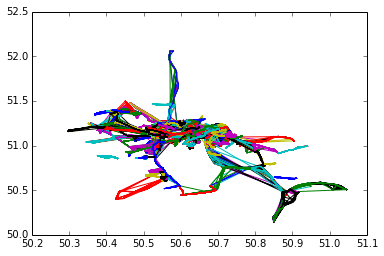

In [3]:
len_num = len(data["id"].unique())
for id in data["id"].unique():
    t = data[data["id"] == id]
    plt.plot(t['latitude'], t['longitude'])       

    

In [4]:
x = route_to_stops_count[route_to_stops_count["hash"] == 86]
k_means = KMeans(n_clusters = x["num"][0])
data_bus = data[data["hash"] == 86]
coor = data_bus[['latitude', 'longitude']]
k_means.fit(coor)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=47, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

/usr/lib/python3/dist-packages/pandas/core/frame.py:1686: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


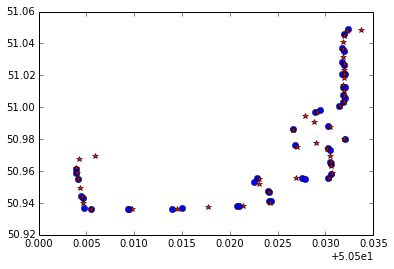

In [5]:
t = debug[debug["hash"] == 86]
z = t[debug["type"] == "bus"]
plt.plot(z['latitude'], z['longitude'], 'o') 
a = []
for i in range(x["num"][0]):
    a.append(k_means.cluster_centers_[i])

plt.plot(*zip(*a), marker='*', color='r', ls='')

In [6]:
unique = debug["hash"].unique()
min_data = len(data[data["hash"] == 86]["type"])
print (min_data)
idx = 86
for i in unique:
    new_min_data =  min((len(data[data["hash"] == i]["type"])), min_data)
    if new_min_data == min_data:
        min_data = new_min_data
        idx = i

print (min_data)
print (idx)

6275
6275
71


In [7]:
unique = data["hash"].unique()
print (unique)


data1 = data[data["hash"] == 86]
route1 = route_to_stops_count[route_to_stops_count["hash"] == 86]
debug1 = debug[debug["hash"] == 86]

print (len(data[data["hash"] == 86]))
print (len(route1))
print (len(debug[debug["hash"] == 86]))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  27  28  29  30  31  32  34  35  36  37  38  39
  40  41  42  43  45  46  47  48  49  50  52  53  54  55  56  26  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  33  73  75  76
  77  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95
  97  98  99 100 102 103 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 137  74 138 139 140 141 142 143 144 145 146 147 148 149 150 151 101
  88 152 153  96 154  44 155 156  20 157  51 136 104 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224]
6275
1
47


In [10]:
data1 = data[data["hash"] == 86]
route1 = route_to_stops_count[route_to_stops_count["hash"] == 86]
debug1 = debug[debug["hash"] == 86]

data1.to_csv('data1.tsv', sep="\t")
route1.to_csv('route1.tsv', sep="\t")
debug1.to_csv('debug1.tsv', sep="\t")

In [4]:
print(data["id"].unique())

[3982 3988 3989 ..., 9148 9149  915]
